# PHYS 310 FINAL PROJECT

### Load the Dataset

Dataset is obtained from the paper:  
**"Prediction and Classification of Formation Energies of Binary Compounds by Machine Learning"**
https://pubs.acs.org/doi/10.1021/acsomega.1c01517?goto=supporting-info#_i28

In [14]:
import pandas as pd
file_path = "ao1c01517_si_003.xlsx"
df = pd.read_excel(file_path, skiprows = 51)
df

,Substance,H(J/mol-atomes),S0（J/cal/mol),BDE(kj/mol),SA(J/cal/deg),SB(J/cal/mol),A_IP(ev),A_EA(ev),A_EN(ev),A_H_ks_level(ev),...,B4_number,B5_NNN,B5_number,B6_NNN,B6_number,B7_NNN,B7_number,B8_NNN,B8_number,Vol(A3)
0,Li2C2,-14850.0000,5.770000,0.0,29.1,5.70,-5.329,-0.698,3.014,-2.874,...,-,-,-,-,-,-,-,-,-,95.88
1,Li3N,-41200.0000,4.681075,0.0,29.1,95.75,-5.329,-0.698,3.014,-2.874,...,-,-,-,-,-,-,-,-,-,45.10
2,Li2O,-199300.0000,5.298567,340.5,29.1,102.55,-5.329,-0.698,3.014,-2.874,...,-,-,-,-,-,-,-,-,-,98.15
3,Li2O2,-158475.0000,5.770000,340.5,29.1,102.55,-5.329,-0.698,3.014,-2.874,...,-,-,-,-,-,-,-,-,-,66.96
4,LiF,-307500.0000,5.770000,577.0,29.1,101.35,-5.329,-0.698,3.014,-2.874,...,-,-,-,-,-,-,-,-,-,68.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,BaF2,-402933.3333,5.298567,580.0,62.4,101.35,-5.516,0.278,2.619,-3.346,...,-,-,-,-,-,-,-,-,-,245.78
179,BaS,-231800.0000,5.770000,0.0,62.4,32.00,-5.516,0.278,2.619,-3.346,...,-,-,-,-,-,-,-,-,-,256.05
180,BaCl2,-286200.0000,5.298567,439.3,62.4,111.50,-5.516,0.278,2.619,-3.346,...,-,-,-,-,-,-,-,-,-,429.84
181,BaBr2,-252566.6667,5.298567,359.9,62.4,76.10,-5.516,0.278,2.619,-3.346,...,-,-,-,-,-,-,-,-,-,407.39


## Select Features and Clean Data

Choose physical and atomic descriptors as features and `H(J/mol-atomes)` as the target (formation energy).  

In [15]:
target = "H(J/mol-atomes)"
features = [
    'S0（J/cal/mol)', 'BDE(kj/mol)', 'SA(J/cal/deg)', 'SB(J/cal/mol)',
    'A_IP(ev)', 'A_EA(ev)', 'A_EN(ev)', 'B_IP(ev)', 'B_EA(ev)', 'B_EN(ev)',
    'Vol(A3)', 'length_a(A)', 'length_b(A)', 'length_c(A)', 
    'A_rs(A)', 'A_rp(A)', 'A_rd(A)', 'B_rs(A)', 'B_rp(A)', 'B_rd(A)',
    'Z', 'SG_Number', 'R_Value'
]
df_clean = df[features + [target]].replace("-", pd.NA)
df_clean = df_clean.dropna()
df_clean = df_clean.astype(float)

X = df_clean[features]
y = df_clean[target]
X.head(), y.head()

(   S0（J/cal/mol)  BDE(kj/mol)  SA(J/cal/deg)  SB(J/cal/mol)  A_IP(ev)  \
 0       5.770000          0.0           29.1           5.70    -5.329   
 1       4.681075          0.0           29.1          95.75    -5.329   
 2       5.298567        340.5           29.1         102.55    -5.329   
 3       5.770000        340.5           29.1         102.55    -5.329   
 4       5.770000        577.0           29.1         101.35    -5.329   
 
    A_EA(ev)  A_EN(ev)  B_IP(ev)  B_EA(ev)  B_EN(ev)  ...  length_c(A)  \
 0    -0.698     3.014   -10.852    -0.872     5.862  ...      5.43440   
 1    -0.698     3.014   -13.585    -1.867     7.726  ...      3.87932   
 2    -0.698     3.014   -16.433    -3.006     9.720  ...      4.61280   
 3    -0.698     3.014   -16.433    -3.006     9.720  ...      7.72400   
 4    -0.698     3.014   -19.404    -4.273    11.839  ...      4.09400   
 
    A_rs(A)  A_rp(A)  A_rd(A)  B_rs(A)  B_rp(A)  B_rd(A)    Z  SG_Number  \
 0    1.652    1.995     6.93   

## Train Model

Use **Random Forest Regressor** model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data & initialize & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data & evaluale
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error is: {mae:.2f}")
print(f"R² Score is: {r2:.2f}")

Mean Absolute Error is: 30972.76
R² Score is: 0.78


## Visualization

Plot the predicted vs. actual formation energies and examine features.

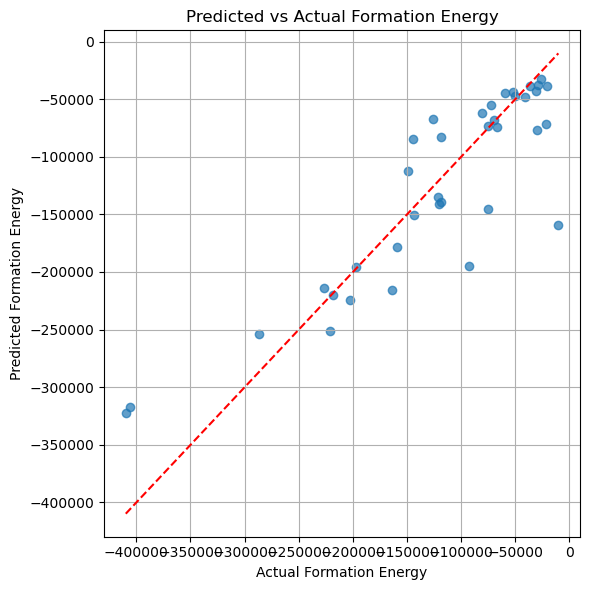

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Formation Energy")
plt.ylabel("Predicted Formation Energy")
plt.title("Predicted vs Actual Formation Energy")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_686/1796090255.py:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


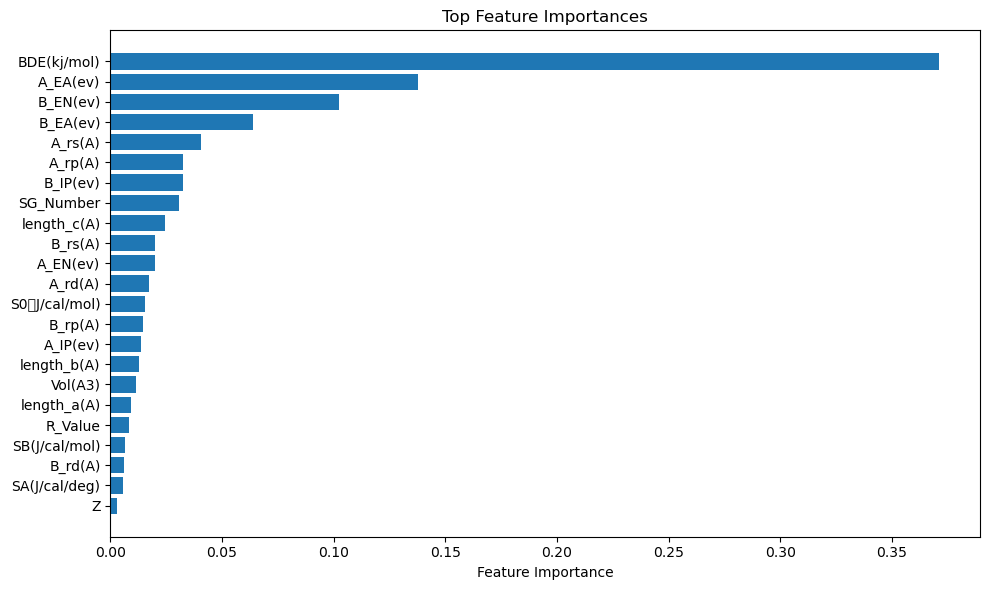

In [18]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Bar plot of top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Model Comparison

Compare our Random Forest model to a Gradient Boosting Regressor.

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"MAE: {mae_gbr:.2f}")
print(f"R² Score: {r2_gbr:.2f}")

MAE: 28059.17
R² Score: 0.86


In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, make_scorer

# Cross Validation
mae_scorer = make_scorer(mean_absolute_error)
rf_cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
rf_cv_mae = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

gbr_cv_r2 = cross_val_score(gbr, X, y, cv=5, scoring='r2')
gbr_cv_mae = cross_val_score(gbr, X, y, cv=5, scoring=mae_scorer)

print("Random Forest - CV R²:", rf_cv_r2.mean(), "CV MAE:", rf_cv_mae.mean())
print("Gradient Boosting - CV R²:", gbr_cv_r2.mean(), "CV MAE:", gbr_cv_mae.mean())

Random Forest - CV R²: 0.7618753893096278 CV MAE: 31896.04232084183
Gradient Boosting - CV R²: 0.7855547850181079 CV MAE: 29402.273959916365


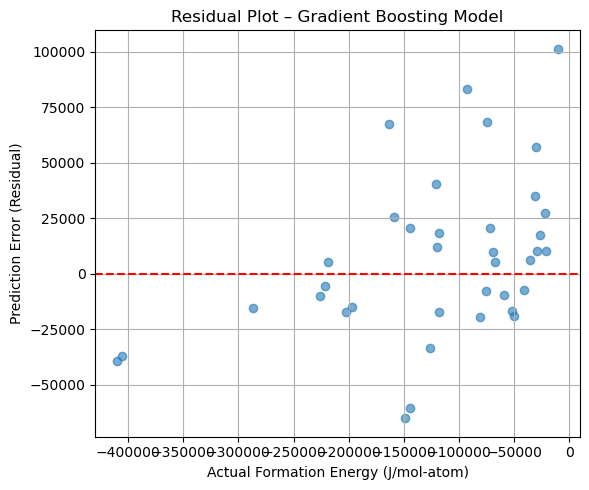

In [21]:
# Residual plot for best model
residuals = y_test - y_pred_gbr

plt.figure(figsize=(6, 5))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Formation Energy (J/mol-atom)")
plt.ylabel("Prediction Error (Residual)")
plt.title("Residual Plot – Gradient Boosting Model")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model with Top 5 features
Smaller model with top 5 features and PCA

In [22]:
top_features = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(5).tolist()
print("Top 5 features:", top_features)

Top 5 features: ['BDE(kj/mol)', 'A_EA(ev)', 'B_EN(ev)', 'B_EA(ev)', 'A_rs(A)']


In [23]:
X_small = X[top_features]
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y, test_size=0.2, random_state=42)
gbr_small = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_small.fit(X_train_small, y_train_small)
y_pred_small = gbr_small.predict(X_test_small)
mae_small = mean_absolute_error(y_test_small, y_pred_small)
r2_small = r2_score(y_test_small, y_pred_small)
print("Small GBR model - MAE:", mae_small)
print("Small GBR model - R²:", r2_small)

Small GBR model - MAE: 29182.571420915418
Small GBR model - R²: 0.8291392845150648


In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=5), GradientBoostingRegressor(n_estimators=100, random_state=42))
pca_pipeline.fit(X_train, y_train)
y_pred_pca = pca_pipeline.predict(X_test)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("PCA + GBR model - MAE:", mae_pca)
print("PCA + GBR model - R²:", r2_pca)

PCA + GBR model - MAE: 42237.20621168072
PCA + GBR model - R²: 0.652603372243924


### Summary

The goal of this project was to develop a machine learning model that could accurately predict the formation energy of binary compounds using only atomic and compositional features to support faster screening of materials.

The Gradient Boosting model showed superior performance compared to Random Forest model, achieving an R² score of 0.86 and a mean absolute error (MAE) of 28,000 J/mol-atom, which suggests that the model is able to make fairly accurate predictions. To further evaluate model reliability, I applied 5-fold cross-validation in which Gradient Boosting remained the best performer with a cross-validated R² of 0.79 and MAE of 29,400 J/mol-atom. 